##1. Using basic statistical properties of the variance, as well as single- variable calculus, derive (5.6). In other words, prove that α given by (5.6) does indeed minimize Var(αX +(1−α)Y).

### Deriving Optimal Investment Fraction Alpha

To derive the value of **$\alpha$** that minimizes $\text{Var}(\alpha X + (1 - \alpha)Y)$, we start by expanding the variance expression using properties of variance and covariance:

\[
$$\text{Var}(\alpha X + (1 - \alpha)Y) = \alpha^2 \sigma_X^2 + (1 - \alpha)^2 \sigma_Y^2 + 2\alpha(1 - \alpha)\sigma_{XY}
\$$]

Expanding and simplifying the terms:

$$
f(\alpha) = \alpha^2 \sigma_X^2 + \sigma_Y^2 - 2\alpha \sigma_Y^2 + \alpha^2 \sigma_Y^2 + 2\alpha \sigma_{XY} - 2\alpha^2 \sigma_{XY}
\$$

Combining like terms:

$$
f(\alpha) = \alpha^2 (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) - 2\alpha (\sigma_Y^2 - \sigma_{XY}) + \sigma_Y^2
$$

To find the critical point, take the derivative with respect to $\alpha$ and set it to zero:

$$
f'(\alpha) = 2\alpha (\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) - 2 (\sigma_Y^2 - \sigma_{XY}) = 0
$$

Solving for $\alpha$ :
$$2\alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) = 2(\sigma_Y^2-\sigma_{XY})$$
$$
$$
$$\alpha = \frac{2(\sigma_Y^2-\sigma_{XY}}{2(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY})}
$$
$$
$$

$$
\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}
$$

The second derivative **$f''(\alpha) = 2(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) $** is positive (since variances and covariance ensure a positive denominator), confirming a minimum. Thus, the optimal $\alpha$ is:

**$$
\boxed{\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}}
$$**

##5.8
###1. (a) Generate a simulated data set as follows:
rng = np.random. default_rng (1)\
x = rng.normal(size =100)\
y = x - 2 * x**2 + rng.normal(size =100)\

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

In [21]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# set the seed for reproducibility
rng = np.random.default_rng(1)

# generate x values from a standard normal distribution
x = rng.normal(size=100)

#geberating y values from the given equation
y = x - 2 * x**2 + rng.normal(size=100)

In [24]:
#viewing the first few rows of generated data
import pandas as pd
data = pd.DataFrame({'x': x, 'y': y})
data.head()

,x,y
0,0.345584,-0.544554
1,0.821618,0.333950
2,0.330437,-0.013532
3,-1.303157,-4.030442
4,0.905356,0.484861


### In thos data n = 100 and p = 1 ( p is the predictor)
### The model used is y = x - $2x^2$ + ε
here x is independent variable/
y is dependent variable\
ε represnt the error term. ( random noise)

###(b)Create a scatterplot of X against Y . Comment on what you find.

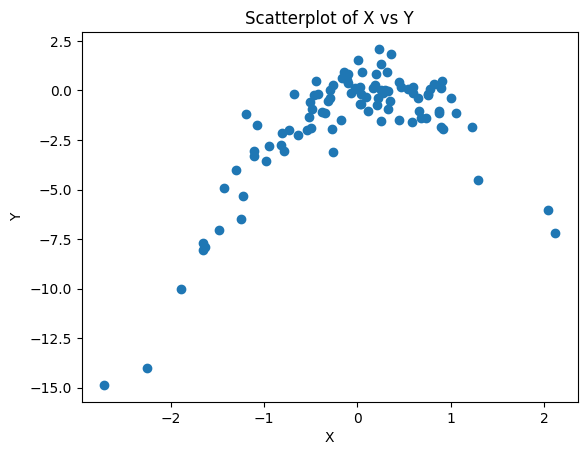

In [25]:
#creating the scatterplot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X vs Y')
plt.show()

#### There is some outlair in this plot. the scatterplot visualizzes the non linear, negatice quadratic relationshio between X and Y as espected from the generated model. as X increase from -2 to 0 y increase and when X moving right y starts decreasing

###(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
i. Y= β0 + β1X + ϵ\
ii. Y= β0 + β1X + β2X2 + ϵ\
iii. Y= β0 + β1X + β2X2 + β3X3 + ϵ\
iv. Y= β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ.\
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y.

In [26]:
#importing required libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#the model was given was are
models = {
    '1': PolynomialFeatures(degree=1),# Y= β0 + β1X + ϵ
    '2': PolynomialFeatures(degree=2),# Y= β0 + β1X + β2X2 + ϵ
    '3': PolynomialFeatures(degree=3),# Y= β0 + β1X + β2X2 + β3X3 + ϵ
    '4': PolynomialFeatures(degree=4)# Y= β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ
}


In [27]:
#initialize LeaveOneOut cross validator
loo = LeaveOneOut()

# store LOOCV for each model
loocv_errors = {}

#loop through each model
for model_name, model in models.items():
  errors = []
  for train_index, test_index in loo.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #transform features for models
    X_train_poly = model.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = model.transform(X_test.reshape(-1, 1))

    # fitting the model
    reg = LinearRegression().fit(X_train_poly, y_train)

    #predicting the calculated error
    y_pred = reg.predict(X_test_poly)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
  loocv_errors[model_name] = np.mean(errors)

In [28]:
# printing the LOOCV Errors
for model_name, error in loocv_errors.items():
  print(f"{model_name}: {error}")

1: 6.633029839181984
2: 1.122936856341969
3: 1.3017965489358863
4: 1.3323942694179336


### model 1 Has the highest error and the model 2 has the lowest error 1.123. so $X^2$ greatly improves the model ability to fit the data. Also $X^3$ and $X4$ does pretty well job expect X

##(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [29]:
#trying random seed 2
rng = np.random.default_rng(2)

# generate x values from a standard normal distribution
x = rng.normal(size=100)

#geberating y values from the given equation
y = x - 2 * x**2 + rng.normal(size=100)

#the model was given was are
models = {
    '1': PolynomialFeatures(degree=1),# Y= β0 + β1X + ϵ
    '2': PolynomialFeatures(degree=2),# Y= β0 + β1X + β2X2 + ϵ
    '3': PolynomialFeatures(degree=3),# Y= β0 + β1X + β2X2 + β3X3 + ϵ
    '4': PolynomialFeatures(degree=4)# Y= β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ
}

#initialize LeaveOneOut cross validator
loo = LeaveOneOut()

# store LOOCV for each model
loocv_errors = {}

#loop through each model
for model_name, model in models.items():
  errors = []
  for train_index, test_index in loo.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #transform features for models
    X_train_poly = model.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = model.transform(X_test.reshape(-1, 1))

    # fitting the model
    reg = LinearRegression().fit(X_train_poly, y_train)

    #predicting the calculated error
    y_pred = reg.predict(X_test_poly)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
  loocv_errors[model_name] = np.mean(errors)

# printing the LOOCV Errors
for model_name, error in loocv_errors.items():
  print(f"{model_name}: {error}")

1: 7.560603694358579
2: 0.9840371744582587
3: 0.9682355765918607
4: 0.9659585554875687


### Still Quartic, cubic and Quadratic model permorming better little bit different and better than C.
Changing the random seed introduce different random noise in the the data generation process. The quadratic model is good choice for capturing the underlying relationship in the data, while higher-order polynomials might risk overfitting. This reinforces the importance of cross validation for assessign model performance and robustness

##(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

Model i (Linear): 6.633\
Model ii (Quadratic): 1.123\
Model iii (Cubic): 1.302\
Model iv (Quartic): 1.332
###**Model ii (Quadratic) has the smallest LOOCV error (1.123)**
**YES** this is expected. The Quadratic model having the smallest LOOCV error is expected because it aligns with the true underlying relationship of data. The linear model is underfitting, while the cubic and quartic models might be slightly overfitting. The quadratic model provides the best fit for this specific datasets, achieving a balance between complexity and accuracy.

##(f) Comment on the statistical significance of the coefficient esti- mates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?



The cross-validation results showed the following Mean Squared Errors (MSE):

Linear: 6.633\
Quadratic: 1.123\
Cubic: 1.302\
Quartic: 1.332\
The cross-validation results indicated that the quadratic model had the lowest test error, suggesting it was the best model among the four.

The statistical significance of the coefficients generally agrees with these conclusions. The quadratic model has significant coefficients for both the x and $x^2$
  terms, which aligns with the true underlying model used to generate the data (y=x−2$x^2$
 +ϵ).

While the cubic and quartic models include significant lower-order terms, the highest-order terms (cubic in the cubic model and quartic in the quartic model) are not statistically significant (p > 0.05). This suggests that these higher-order terms might be overfitting the data, which is consistent with the slightly higher cross-validation MSEs observed for the cubic and quartic models compared to the quadratic model.

The linear model has a significant coefficient for x, but its high cross-validation MSE indicates that it is underfitting the data because it misses the important quadratic term.

In summary, the statistical significance of the coefficient estimates supports the conclusion from the cross-validation results that the quadratic model is the most appropriate for this dataset among the models considered.